DIP ASSIGNMENT 1 </BR>
Q2.1 </BR>
(ZIYAAD BALLIM - 1828251)

2.1 - Construct and apply frequency domain filters

In [6]:
import cv2
import imageio
import math
from scipy import misc
import numpy as np
np.set_printoptions(suppress=True)
import scipy.fftpack as fp
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings("ignore")

In [7]:
def ButterWorthBandreject(M,N,D0,W,n=2):
    Btr=np.zeros((M,N),dtype=float)
    HalfH=M//2
    HalfW=N//2
    for i in range(-HalfH,HalfH):
        for k in range(-HalfW,HalfW):
            D=math.sqrt((i**2)+(k**2))
            Btr[i+HalfH,k+HalfW]=1/(1+math.pow((D*W)/(D**2-(D0**2+0.0000001)),2*n))
    return Btr

Text(0.5, 1.0, 'Initial Image Frequency Domain')

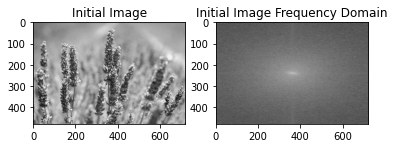

In [8]:
lavender=io.imread("images/lavender.png")
lav_freq_dom=fp.fftshift(fp.fft2((lavender).astype(float)))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(lavender,cmap="gray")
plt.title("Initial Image")
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(lav_freq_dom)),cmap="gray")
plt.title("Initial Image Frequency Domain")

In [9]:
W=[5,25,50,100,200]
D0=[0,10,25,50,150]

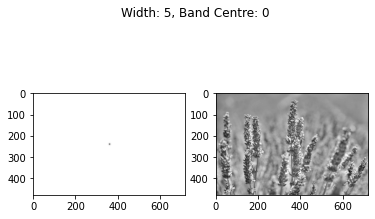

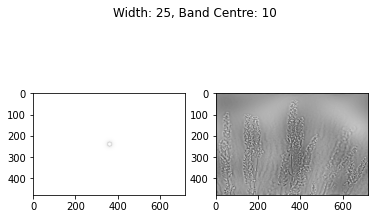

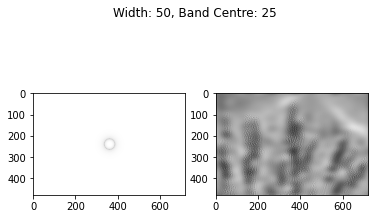

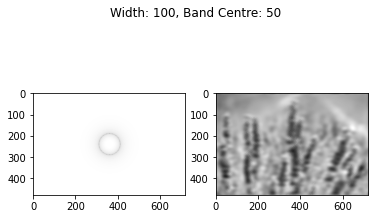

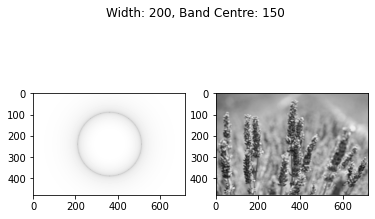

In [10]:
Row,Col=lavender.shape
for i in range(len(W)):
    filter=ButterWorthBandreject(Row,Col,D0[i],W[i])
    band=filter*lav_freq_dom
    Lavpic=np.fft.ifft2(np.fft.ifftshift(band))
    Lavpic=Lavpic.real
    Lavpic[Lavpic<0]=0
    Lavpic[Lavpic>255]=255

    plt.figure()
    plt.suptitle("Width: %s, Band Centre: %s"%(W[i],D0[i]))
    plt.subplot(1,2,1)
    plt.imshow(np.log(np.abs(filter)),cmap="gray")
    plt.subplot(1,2,2)
    plt.imshow(Lavpic,cmap="gray")